This project used deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables. 

The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. 
The covertypes are the following:
Spruce/Fir Lodgepole Pine Ponderosa Pine Cottonwood/Willow Aspen Douglas-fir Krummholz

Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is raw and has not been scaled or preprocessed for you. It contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, InputLayer
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#loading and investigating the data
df = pd.read_csv('cover_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Checking the data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
df.shape

(581012, 55)

581012 observations, 55 columns, 54 features, the last one is class

In [5]:
#checking for missing data
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Spliting the data into labels and features

In [6]:
labels = df.iloc[: ,-1]
features = df.iloc[:,0:-1]

Spliting the data into training sets and test sets

In [7]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

Normalizing the data

In [8]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

Creating the neural network model

In [9]:
def design_model(x):
    model = Sequential()
    input = InputLayer(input_shape=(x.shape[1],))
    model.add(input)
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Applying the model to the scaled training data

In [10]:
model = design_model(features_train_scaled)

Fitting the model

Creating the early stopping for efficiency

In [11]:
es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=50)

In [12]:
history = model.fit(features_train_scaled, labels_train, epochs=300, batch_size=1000, verbose=1, validation_split=0.3, callbacks=[es])

Epoch 1/300


c:\Users\kuba\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


285/285 [==============================] - 2s 6ms/step - loss: 0.7453 - accuracy: 0.6998 - val_loss: 0.6012 - val_accuracy: 0.7456
Epoch 2/300
285/285 [==============================] - 1s 5ms/step - loss: 0.5742 - accuracy: 0.7576 - val_loss: 0.5513 - val_accuracy: 0.7644
Epoch 3/300
285/285 [==============================] - 1s 5ms/step - loss: 0.5334 - accuracy: 0.7726 - val_loss: 0.5168 - val_accuracy: 0.7783
Epoch 4/300
285/285 [==============================] - 1s 5ms/step - loss: 0.5041 - accuracy: 0.7849 - val_loss: 0.4938 - val_accuracy: 0.7891
Epoch 5/300
285/285 [==============================] - 1s 5ms/step - loss: 0.4808 - accuracy: 0.7948 - val_loss: 0.4685 - val_accuracy: 0.7995
Epoch 6/300
285/285 [==============================] - 1s 5ms/step - loss: 0.4606 - accuracy: 0.8045 - val_loss: 0.4538 - val_accuracy: 0.8059
Epoch 7/300
285/285 [==============================] - 1s 5ms/step - loss: 0.4439 - accuracy: 0.8127 - val_loss: 0.4372 - val_accuracy: 0.8144
Epoch 8/300

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 15,816
Trainable params: 15,816
Non-trainable params: 0
_________________________________________________________________


Evaluating the model

In [18]:
score = model.evaluate(features_test_scaled, labels_test, verbose=0)
print('Test loss: {score}'.format(score=score[0]))
print('Test accuracy: {score}'.format(score=score[1]))

Test loss: 0.2996196448802948
Test accuracy: 0.8806625008583069


Classification report

In [19]:
pred = model.predict(features_test_scaled)

pred = np.argmax(pred, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspem', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, pred, target_names=class_names))

5447/5447 [==============================] - 7s 1ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.87      0.89      0.88     63556
   Lodgepole Pine       0.90      0.89      0.90     85078
   Ponderosa Pine       0.89      0.82      0.86     10638
Cottonwood/Willow       0.89      0.68      0.77       795
            Aspem       0.76      0.63      0.68      2941
      Douglas-fir       0.69      0.83      0.75      5227
        Krummholz       0.93      0.85      0.89      6069

         accuracy                           0.88    174304
        macro avg       0.85      0.80      0.82    174304
     weighted avg       0.88      0.88      0.88    174304



Plotting the accuracy and loss

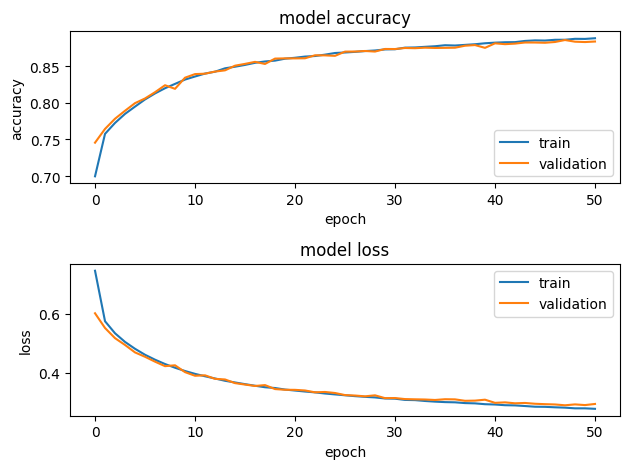

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'])

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend(['train', 'validation'])

fig.tight_layout()
plt.show()

This project gave the opportunity to practice adjusting hyperparameters, early stopping and number of neural networks. Accuracy of 0.88 was achieved.
Model provided a good classification except for Aspem which had the lowest F1-score